In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('postgresql://<username>:<password>@localhost/employee')
connection = engine.connect()
salary_ranges = pd.read_sql("SELECT * FROM salaries", connection).fillna(0)

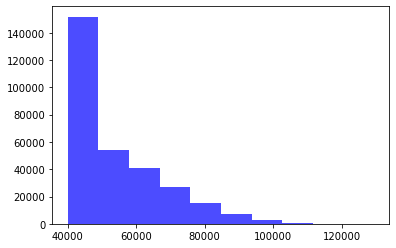

In [2]:
x = salary_ranges.salary
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.7)
plt.subplots_adjust(left=0.12)
plt.show()

In [3]:
salary_df = pd.read_sql("""SELECT t.title "Title", s.salary "Salary" FROM titles t INNER JOIN employees e ON e.emp_title_id = t.title_id INNER JOIN salaries s ON s.emp_no = e.emp_no""", connection)
salary_df.fillna(0)
new_salary_df = salary_df.groupby(['Title']).mean()

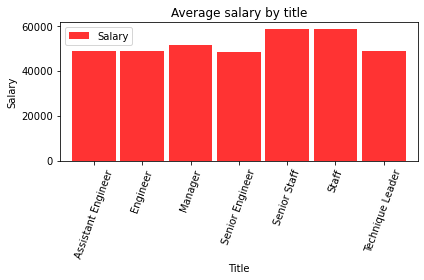

In [4]:
new_salary_df.plot(kind="bar", rot=70, color='r', alpha=0.8, align="center", width=0.9)
plt.title("Average salary by title")
plt.ylabel("Salary")
plt.xlabel("Title")
# Display the graph
plt.tight_layout()
plt.show()